## PROJETO: Auxiliando os Times de Marketing e Pricing da Empresa de Delivery


## INTRODUÇAO

Nesse estudo vamos analisar o Dataset da empresa Delivery Center uma plataforma de logística e entregas que tinha como diferencial o atendimento a clientes instalados em shopping centers de grandes capitais do Brasil.

[Link no Kaggle](https://www.kaggle.com/datasets/nosbielcs/brazilian-delivery-center/)



## Descrição do Dataset

Depois ve visualizar o dataframe, abaixo está a descrição no conjunto de 7 datasets:

Channels: Canais de venda onde são vendidos os produtos e alimentos dos lojistas.

Deliveries:Contém os detalhes das entregas realizadas pelos parceiros.

Drivers: Lista os entregadores cadastrados na plataforma.

Hubs: Contém informações sobre os hubs logísticos de distribuição dos pedidos.

Orders: Informações sobre os pedidos realizados através da plataforma do Delivery.

Payments: informações sobre os pagamentos realizados ao Delivery Center.

Stores: informações sobre os lojistas que utilizam a Plataforma do Delivery Center para vender seus itens (good e/ou food) nos marketplaces.


## Objetivo do Trabalho

1. Numa ação de marketing, para atrair mais entregadores, vamos dar uma bonificação para os 20 entregadores que possuem maior distância percorrida ao todo. A bonificação vai variar de acordo com o tipo de profissional que ele é e o modelo que ele usa para se locomover (moto, bike, etc). Levante essas informações.

2. Além disso, o time de Pricing precisa ajustar os valores pagos aos entregadores. Para isso, eles precisam da distribuição da distância média percorrida pelos motoqueiros separada por estado, já que cada região terá seu preço.

3. Por fim, o CFO precisa de alguns indicadores de receita para apresentar para a diretoria executiva. Dentre esses indicadores, vocês precisarão levantar (1) a receita média e total separada por tipo (Food x Good), (2) A receita média e total por estado. Ou seja, são 4 tabelas ao todo.

4. Se a empresa tem um gasto fixo de 5 reais por entrega, recebe 15% do valor de cada entrega como receita e, do total do lucro, distribui 20% em forma de bônus para os 2 mil funcionários, quanto cada um irá receber no período contido no dataset?

## Importando as Bibliotecas
Nessa etapa será carregados os pacotes utilizados e os dados serão lidos estado bruto.

In [1]:
# ## PROJETO: Auxiliando os Times de Marketing e Pricing da Empresa de Delivery

# Importando as Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignorando avisos
warnings.filterwarnings("ignore")

# Configurar o estilo dos gráficos para ggplot
plt.style.use('ggplot')

# Configurar e exibição de até 20 linhas de um DataFrame do Pandas
pd.set_option("display.max_rows", 20)

# Configurar e exibição de todas as colunas de um DataFrame do Pandas
pd.set_option("display.max_columns", None)


# 1. CARREGANDO OS DADOS

In [2]:

# Lendo os arquivos CSV
channels = pd.read_csv('channels.csv')
deliveries = pd.read_csv('deliveries.csv')
drivers = pd.read_csv('drivers.csv')
orders = pd.read_csv('orders.csv')
payments = pd.read_csv('payments.csv')
hubs = pd.read_csv('hubs.csv', encoding="ISO-8859-2")
stores = pd.read_csv('stores.csv', encoding="ISO-8859-2")


# 2. LIMPEZA DOS DADOS

In [3]:
# Channels - Vizualização e Limpeza  Não será necessario fazer nenhuma alteração no momento
channels.head(3)

,channel_id,channel_name,channel_type
0,1,OTHER PLACE,OWN CHANNEL
1,2,PHONE PLACE,OWN CHANNEL
2,3,WHATS PLACE,OWN CHANNEL


In [4]:
# Não será necessario fazer nenhuma alteração em Channels no momento

In [5]:
# Deliveries - Vizualização e Limpeza básica
deliveries.head(3)



,delivery_id,delivery_order_id,driver_id,delivery_distance_meters,delivery_status
0,2174658,68413340,8378.0,5199.0,DELIVERED
1,2174660,68414309,2473.0,410.0,DELIVERED
2,2174661,68416230,7615.0,3784.0,DELIVERED


In [6]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378843 entries, 0 to 378842
Data columns (total 5 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   delivery_id               378843 non-null  int64  
 1   delivery_order_id         378843 non-null  int64  
 2   driver_id                 362957 non-null  float64
 3   delivery_distance_meters  378770 non-null  float64
 4   delivery_status           378843 non-null  object 
dtypes: float64(2), int64(2), object(1)
memory usage: 14.5+ MB


In [7]:
#Limpeza básica
df_deliveries = deliveries.dropna().drop_duplicates(subset=["delivery_id"])
deliveries_clean = df_deliveries[df_deliveries["delivery_status"] == "DELIVERED"]

deliveries_clean.head(3)

,delivery_id,delivery_order_id,driver_id,delivery_distance_meters,delivery_status
0,2174658,68413340,8378.0,5199.0,DELIVERED
1,2174660,68414309,2473.0,410.0,DELIVERED
2,2174661,68416230,7615.0,3784.0,DELIVERED


In [8]:
# Remoção de outliers em deliveries
Q1 = deliveries_clean['delivery_distance_meters'].quantile(0.25)
Q3 = deliveries_clean['delivery_distance_meters'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
deliveries_cleaned = deliveries_clean[
    (deliveries_clean['delivery_distance_meters'] >= limite_inferior) & 
    (deliveries_clean['delivery_distance_meters'] <= limite_superior)
]



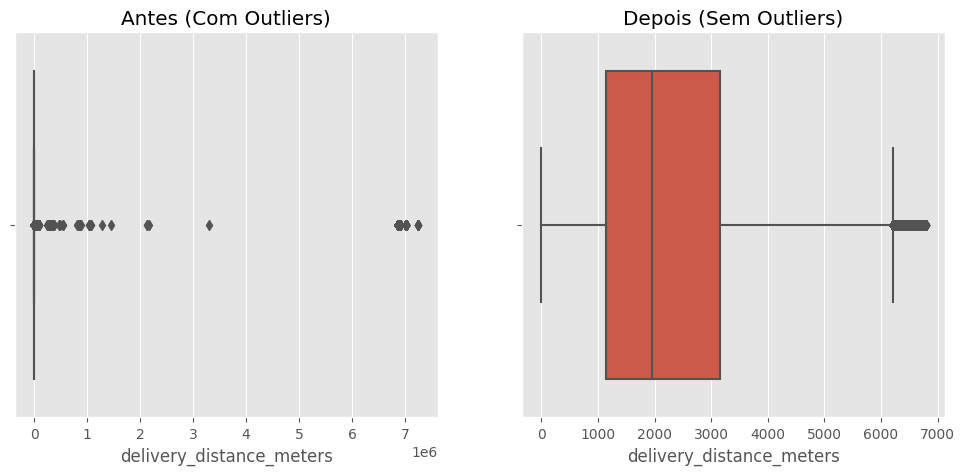

In [9]:
#Comparar os boxplots antes e depois da limpeza:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x=deliveries['delivery_distance_meters'], ax=axs[0])
axs[0].set_title('Antes (Com Outliers)')

sns.boxplot(x=deliveries_cleaned['delivery_distance_meters'], ax=axs[1])
axs[1].set_title('Depois (Sem Outliers)')

plt.show()

In [10]:
#Drivers - Vizualização e Limpeza básica
drivers.head(3)

,driver_id,driver_modal,driver_type
0,133,MOTOBOY,LOGISTIC OPERATOR
1,138,MOTOBOY,FREELANCE
2,140,MOTOBOY,FREELANCE


In [11]:
drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4824 entries, 0 to 4823
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   driver_id     4824 non-null   int64 
 1   driver_modal  4824 non-null   object
 2   driver_type   4824 non-null   object
dtypes: int64(1), object(2)
memory usage: 113.2+ KB


In [12]:
drivers_cleaned = drivers[['driver_id', 'driver_modal']]

In [13]:
# Orders - Vizualização e Limpeza básica
orders.head(3)

,order_id,store_id,channel_id,payment_order_id,delivery_order_id,order_status,order_amount,order_delivery_fee,order_delivery_cost,order_created_hour,order_created_minute,order_created_day,order_created_month,order_created_year,order_moment_created,order_moment_accepted,order_moment_ready,order_moment_collected,order_moment_in_expedition,order_moment_delivering,order_moment_delivered,order_moment_finished,order_metric_collected_time,order_metric_paused_time,order_metric_production_time,order_metric_walking_time,order_metric_expediton_speed_time,order_metric_transit_time,order_metric_cycle_time
0,68405119,3512,5,68405119,68405119,CANCELED,62.7,0.0,NaN,0,1,1,1,2021,1/1/2021 12:01:36 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,68405123,3512,5,68405123,68405123,CANCELED,62.7,0.0,NaN,0,4,1,1,2021,1/1/2021 12:04:26 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,68405206,3512,5,68405206,68405206,CANCELED,115.5,0.0,NaN,0,13,1,1,2021,1/1/2021 12:13:07 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368999 entries, 0 to 368998
Data columns (total 29 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   order_id                           368999 non-null  int64  
 1   store_id                           368999 non-null  int64  
 2   channel_id                         368999 non-null  int64  
 3   payment_order_id                   368999 non-null  int64  
 4   delivery_order_id                  368999 non-null  int64  
 5   order_status                       368999 non-null  object 
 6   order_amount                       368999 non-null  float64
 7   order_delivery_fee                 368999 non-null  float64
 8   order_delivery_cost                361794 non-null  float64
 9   order_created_hour                 368999 non-null  int64  
 10  order_created_minute               368999 non-null  int64  
 11  order_created_day                  3689

In [15]:
orders_cleaned = orders[['order_id', 'store_id', 'payment_order_id', 'delivery_order_id', 'order_status', 'order_created_month', 'order_created_year']]

In [16]:
orders_cleaned.head(5)

,order_id,store_id,payment_order_id,delivery_order_id,order_status,order_created_month,order_created_year
0,68405119,3512,68405119,68405119,CANCELED,1,2021
1,68405123,3512,68405123,68405123,CANCELED,1,2021
2,68405206,3512,68405206,68405206,CANCELED,1,2021
3,68405465,3401,68405465,68405465,CANCELED,1,2021
4,68406064,3401,68406064,68406064,CANCELED,1,2021


In [17]:
# Payments - Vizualização e Limpeza básica

In [18]:
payments.head(3)

,payment_id,payment_order_id,payment_amount,payment_fee,payment_method,payment_status
0,4427917,68410055,118.44,0.00,VOUCHER,PAID
1,4427918,68410055,394.81,7.90,ONLINE,PAID
2,4427941,68412721,206.95,5.59,ONLINE,PAID


In [19]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400834 entries, 0 to 400833
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   payment_id        400834 non-null  int64  
 1   payment_order_id  400834 non-null  int64  
 2   payment_amount    400834 non-null  float64
 3   payment_fee       400659 non-null  float64
 4   payment_method    400834 non-null  object 
 5   payment_status    400834 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 18.3+ MB


In [20]:
payments['payment_amount'] = pd.to_numeric(payments['payment_amount'], errors='coerce')
payments['payment_fee'] = pd.to_numeric(payments['payment_fee'], errors='coerce')

# Remover linhas com valores ausentes em AMBAS as colunas
payments_clean = payments.dropna(subset=['payment_amount', 'payment_fee'])

In [21]:
# 5. Resetar o índice 
payments_clean = payments_clean.reset_index(drop=True)

In [22]:
# Remoção de outliers em payments
Q1_pay = payments_clean['payment_amount'].quantile(0.25)
Q3_pay = payments_clean['payment_amount'].quantile(0.75)
IQR_pay = Q3_pay - Q1_pay
limite_inferior_pay = Q1_pay - 1.5 * IQR_pay
limite_superior_pay = Q3_pay + 1.5 * IQR_pay
payments_cleaned = payments_clean[
    (payments_clean['payment_amount'] >= limite_inferior_pay) & 
    (payments_clean['payment_amount'] <= limite_superior_pay)
]


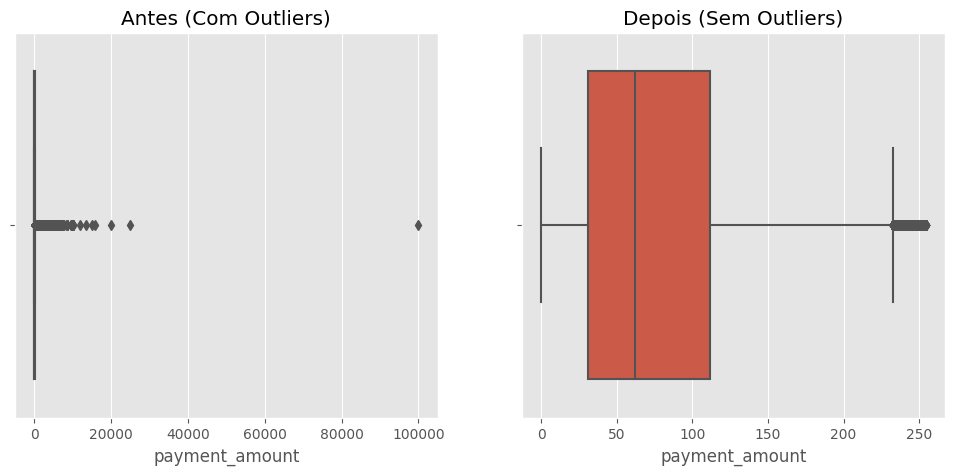

In [23]:
#Comparar os boxplots antes e depois da limpeza:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x=payments['payment_amount'], ax=axs[0])
axs[0].set_title('Antes (Com Outliers)')

sns.boxplot(x=payments_cleaned['payment_amount'], ax=axs[1])
axs[1].set_title('Depois (Sem Outliers)')

plt.show()

In [24]:
payments_cleaned.head(3)

,payment_id,payment_order_id,payment_amount,payment_fee,payment_method,payment_status
0,4427917,68410055,118.44,0.00,VOUCHER,PAID
2,4427941,68412721,206.95,5.59,ONLINE,PAID
3,4427948,68413340,58.80,1.59,ONLINE,PAID


In [25]:
# Hubs - Vizualização e Limpeza básica
hubs.head(3)

,hub_id,hub_name,hub_city,hub_state,hub_latitude,hub_longitude
0,2,BLUE SHOPPING,PORTO ALEGRE,RS,-30.047415,-51.213510
1,3,GREEN SHOPPING,PORTO ALEGRE,RS,-30.037415,-51.203520
2,4,RED SHOPPING,PORTO ALEGRE,RS,-30.021948,-51.208382


In [26]:
hubs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   hub_id         32 non-null     int64  
 1   hub_name       32 non-null     object 
 2   hub_city       32 non-null     object 
 3   hub_state      32 non-null     object 
 4   hub_latitude   32 non-null     float64
 5   hub_longitude  32 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.6+ KB


In [27]:
hubs_cleaned = hubs[['hub_id', 'hub_name', 'hub_city', 'hub_state']]

In [28]:
hubs_cleaned.head(3)

,hub_id,hub_name,hub_city,hub_state
0,2,BLUE SHOPPING,PORTO ALEGRE,RS
1,3,GREEN SHOPPING,PORTO ALEGRE,RS
2,4,RED SHOPPING,PORTO ALEGRE,RS


In [29]:
# Stores - Limpeza
stores.head(3)

,store_id,hub_id,store_name,store_segment,store_plan_price,store_latitude,store_longitude
0,3,2,CUMIURI,FOOD,0.0,NaN,NaN
1,6,3,PIMGUCIS DA VIVA,FOOD,0.0,-30.037415,-51.20352
2,8,3,RASMUR S,FOOD,0.0,-30.037415,-51.20352


In [30]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   store_id          951 non-null    int64  
 1   hub_id            951 non-null    int64  
 2   store_name        951 non-null    object 
 3   store_segment     951 non-null    object 
 4   store_plan_price  836 non-null    float64
 5   store_latitude    935 non-null    float64
 6   store_longitude   935 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 52.1+ KB


In [31]:
stores_cleaned = stores[['store_id', 'hub_id', 'store_segment']]

In [32]:
stores_cleaned.head(3)

,store_id,hub_id,store_segment
0,3,2,FOOD
1,6,3,FOOD
2,8,3,FOOD


# 3. JUNTANDO OS DADOS


In [33]:
# Fazer os merges 

df_temp = pd.merge(deliveries_cleaned, orders_cleaned, on='delivery_order_id', how='inner')
df_temp = pd.merge(df_temp,payments_cleaned[['payment_order_id', 'payment_amount']],left_on='order_id',
                   right_on='payment_order_id',how='left'
)

df_final = pd.merge(df_temp, stores_cleaned, on='store_id', how='left')
df_final = pd.merge(df_final, hubs_cleaned[['hub_id', 'hub_state']], on='hub_id', how='left')
df_final = pd.merge(df_final, drivers_cleaned, on='driver_id', how='left')


In [34]:
# Remover linhas com valores nulos importantes
df_final = df_final.dropna(subset=['payment_amount', 'hub_state'])



In [35]:
df_final.head(3)

,delivery_id,delivery_order_id,driver_id,delivery_distance_meters,delivery_status,order_id,store_id,payment_order_id_x,order_status,order_created_month,order_created_year,payment_order_id_y,payment_amount,hub_id,store_segment,hub_state,driver_modal
0,2174658,68413340,8378.0,5199.0,DELIVERED,68413340,631,68413340,FINISHED,1,2021,68413340.0,58.80,28,FOOD,SP,MOTOBOY
1,2174660,68414309,2473.0,410.0,DELIVERED,68414309,236,68414309,FINISHED,1,2021,68414309.0,106.80,13,FOOD,RJ,BIKER
2,2174661,68416230,7615.0,3784.0,DELIVERED,68416230,1016,68416230,FINISHED,1,2021,68416230.0,46.79,36,FOOD,RS,MOTOBOY


# 4. RESPONDENDO AS QUESTÕES

In [36]:
# Análise 1: Top 20 entregadores por distância

top_drivers = df_final.groupby(['driver_id', 'driver_modal'])['delivery_distance_meters'].sum().reset_index()
top_drivers = top_drivers.sort_values('delivery_distance_meters', ascending=False)


# Separando por tipo de veículo em KM
print("\nTop 20 Motoboys em KM:")
motoboy_top20 = top_drivers[top_drivers["driver_modal"] == "MOTOBOY"].head(20).copy()
motoboy_top20['delivery_distance_km'] = motoboy_top20['delivery_distance_meters'] / 1000
display(motoboy_top20[['driver_id', 'driver_modal', 'delivery_distance_km']]),

print("\nTop 20 Bicicletas em KM:")
bikes_top20 = top_drivers[top_drivers["driver_modal"] == "BIKER"].head(20).copy()
bikes_top20['delivery_distance_km'] = bikes_top20['delivery_distance_meters'] / 1000
display(bikes_top20[['driver_id', 'driver_modal', 'delivery_distance_km']])



Top 20 Motoboys em KM:


,driver_id,driver_modal,delivery_distance_km
1967,25651.0,MOTOBOY,33531.568
2020,26223.0,MOTOBOY,17549.561
727,7615.0,MOTOBOY,3239.427
722,7549.0,MOTOBOY,2761.644
926,9806.0,MOTOBOY,2757.244
425,4737.0,MOTOBOY,2742.996
1087,11522.0,MOTOBOY,2613.932
2502,32109.0,MOTOBOY,2551.168
144,902.0,MOTOBOY,2477.290
1890,24584.0,MOTOBOY,2422.352



Top 20 Bicicletas em KM:


,driver_id,driver_modal,delivery_distance_km
364,3780.0,BIKER,995.601
127,794.0,BIKER,971.670
1176,12724.0,BIKER,760.635
728,7638.0,BIKER,723.981
1534,18487.0,BIKER,714.211
185,1203.0,BIKER,685.204
748,7773.0,BIKER,670.548
1247,14059.0,BIKER,669.149
1548,18748.0,BIKER,664.427
415,4536.0,BIKER,658.929



2. DISTÂNCIA MÉDIA POR ESTADO (KM):
hub_state
RS    2.849582
PR    2.648556
SP    2.211906
RJ    2.019494
Name: delivery_distance_meters, dtype: float64


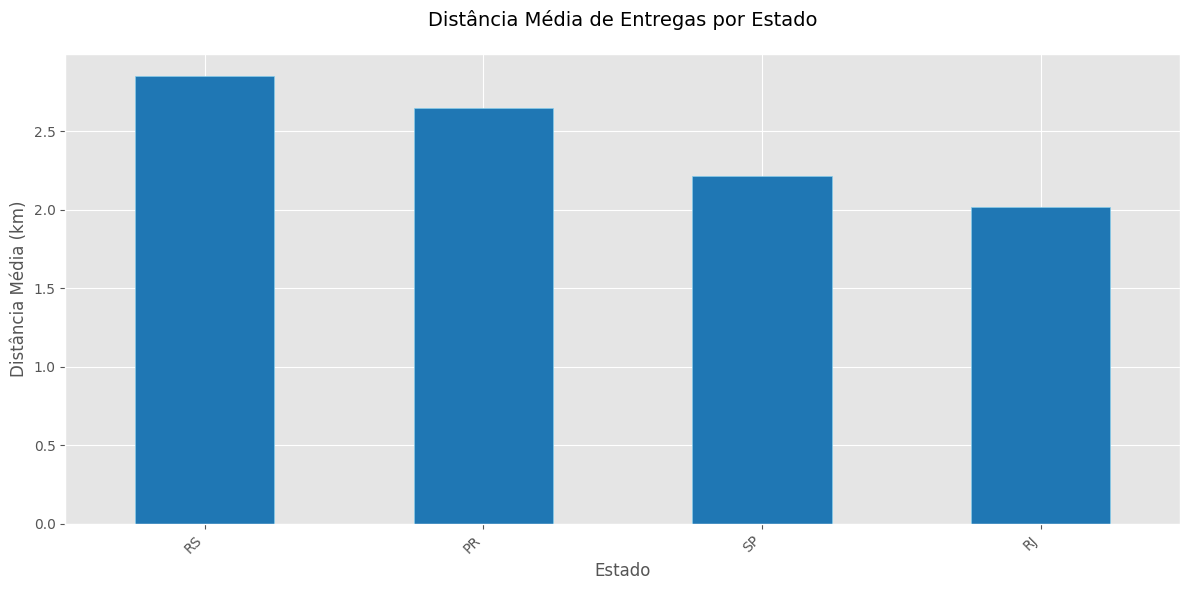

In [37]:
# Análise 2: Distância média por estado


print("\n2. DISTÂNCIA MÉDIA POR ESTADO (KM):")
media_dist_estado = df_final.groupby('hub_state')['delivery_distance_meters'].mean() / 1000
media_dist_estado = media_dist_estado.sort_values(ascending=False)
print(media_dist_estado)


#Gráfico de barras
plt.figure(figsize=(12, 6))
media_dist_estado.plot(kind='bar', color='#1f77b4', edgecolor='skyblue')
plt.title('Distância Média de Entregas por Estado', fontsize=14, pad=20)
plt.xlabel('Estado')
plt.ylabel('Distância Média (km)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('distancia_media_estado.png', dpi=300)
plt.show()

In [38]:
#Distância média por estado - Separado por tipo de veículo

# Calcular a média de distância perrocida por Motoboy 
motoboy_data = df_final[df_final['driver_modal'] == 'MOTOBOY']
media_motoboy = motoboy_data.groupby('hub_state')['delivery_distance_meters'].mean() / 1000
media_motoboy = media_motoboy.sort_values(ascending=False)


# Calcular a média de distância perrocida por Ciclista 
biker_data = df_final[df_final['driver_modal'] == 'BIKER']
media_biker = biker_data.groupby('hub_state')['delivery_distance_meters'].mean() / 1000
media_biker = media_biker.sort_values(ascending=False)

# Exibir os dados
print("\nDistância Média por Estado - Motoboys (km):")
print(media_motoboy)
print("\nDistância Média por Estado - Bikers (km):")
print(media_biker)


Distância Média por Estado - Motoboys (km):
hub_state
RS    3.127158
PR    2.858723
RJ    2.701300
SP    2.569451
Name: delivery_distance_meters, dtype: float64

Distância Média por Estado - Bikers (km):
hub_state
PR    1.428831
RS    1.184386
SP    1.075863
RJ    1.017056
Name: delivery_distance_meters, dtype: float64


In [39]:
# Análise 3: Receita por tipo e por estado Média e Soma
print("\n3. Receita por Tipo de Produto (Média e Soma):")
receita_tipo = df_final.groupby('store_segment')['payment_amount'].agg(['mean', 'sum'])
print(receita_tipo)

print("\n Estados por Receita (Média e Soma):")
receita_estado = df_final.groupby('hub_state')['payment_amount'].agg(['mean', 'sum'])
print(receita_estado.sort_values('sum', ascending=False))


3. Receita por Tipo de Produto (Média e Soma):
                     mean          sum
store_segment                         
FOOD            73.594760  26234912.78
GOOD           115.180913   2560241.33

 Estados por Receita (Média e Soma):
                mean          sum
hub_state                        
SP         84.929313  13769674.42
RJ         76.796128  11297248.01
RS         58.875110   2187269.20
PR         47.682721   1540962.48


In [40]:
# Análise 4: Cálculo de bônus
print("\n4. CÁLCULO DE BÔNUS PARA FUNCIONÁRIOS:")
total_entregas = len(df_final)
receita_total = df_final['payment_amount'].sum()
receita_empresa = receita_total * 0.15
custo_fixo = total_entregas * 5
lucro = receita_empresa - custo_fixo
bonus_total = lucro * 0.20
bonus_por_funcionario = bonus_total / 2000

print(f"\nTotal de entregas: {total_entregas}")
print(f"Receita total: R${receita_total:,.2f}")
print(f"Receita das empresas (15%): R${receita_empresa:,.2f}")
print(f"Custo fixo (R$5 por entrega): R${custo_fixo:,.2f}")
print(f"Lucro: R${lucro:,.2f}")
print(f"Bônus total (20% do lucro): R${bonus_total:,.2f}")
print(f"Bônus por funcionário (2000 func.): R${bonus_por_funcionario:,.2f}")




4. CÁLCULO DE BÔNUS PARA FUNCIONÁRIOS:

Total de entregas: 378706
Receita total: R$28,795,154.11
Receita das empresas (15%): R$4,319,273.12
Custo fixo (R$5 por entrega): R$1,893,530.00
Lucro: R$2,425,743.12
Bônus total (20% do lucro): R$485,148.62
Bônus por funcionário (2000 func.): R$242.57
